In [80]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [81]:
liver= pd.read_csv('Liver_disease_data.csv')

In [82]:
liver.head()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1


In [83]:
liver.tail()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
1695,42,0,38.498295,14.384688,0,1,0.992289,0,0,97.933961,1
1696,40,0,27.600094,5.431009,0,0,8.390492,0,0,70.260528,1
1697,38,0,38.730017,6.324302,1,2,9.314222,0,1,56.053370,1
1698,67,0,35.820798,16.899417,0,2,3.224453,0,0,26.300875,1
1699,80,0,24.060783,9.526447,0,0,9.261426,0,1,73.572893,1


In [84]:
liver.shape

(1700, 11)

In [85]:
liver.columns

Index(['Age', 'Gender', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk',
       'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest',
       'Diagnosis'],
      dtype='object')

In [86]:
liver.dtypes

Age                     int64
Gender                  int64
BMI                   float64
AlcoholConsumption    float64
Smoking                 int64
GeneticRisk             int64
PhysicalActivity      float64
Diabetes                int64
Hypertension            int64
LiverFunctionTest     float64
Diagnosis               int64
dtype: object

In [87]:
liver.describe()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,50.394118,0.504118,27.699801,9.832309,0.291765,0.521765,5.000993,0.142353,0.154706,59.863867,0.550588
std,17.641915,0.500130,7.210400,5.757472,0.454708,0.666262,2.847074,0.349515,0.361730,22.996262,0.497581
min,20.000000,0.000000,15.004710,0.003731,0.000000,0.000000,0.001852,0.000000,0.000000,20.019254,0.000000
25%,35.000000,0.000000,21.455414,4.841811,0.000000,0.000000,2.622121,0.000000,0.000000,40.024216,0.000000
50%,51.000000,1.000000,27.925367,9.828195,0.000000,0.000000,5.022883,0.000000,0.000000,59.513146,1.000000
75%,66.000000,1.000000,33.957668,14.871671,1.000000,1.000000,7.401642,0.000000,0.000000,79.428755,1.000000
max,80.000000,1.000000,39.992845,19.952456,1.000000,2.000000,9.994964,1.000000,1.000000,99.991413,1.000000


In [88]:
liver.isnull()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1695,False,False,False,False,False,False,False,False,False,False,False
1696,False,False,False,False,False,False,False,False,False,False,False
1697,False,False,False,False,False,False,False,False,False,False,False
1698,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

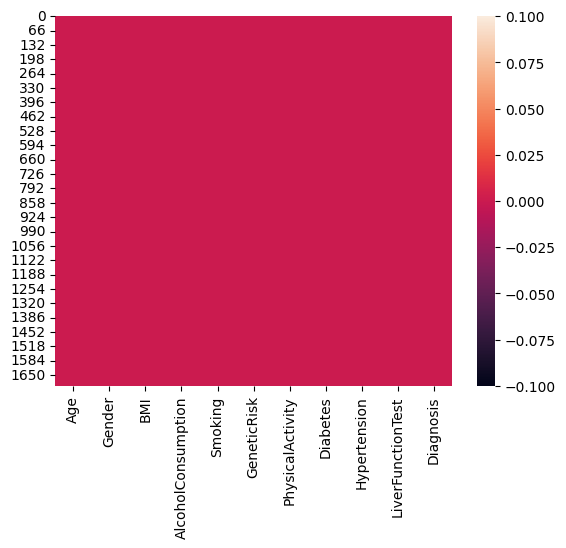

In [89]:
sns.heatmap(liver.isnull())

Negative (0): 936
Positive (1): 764


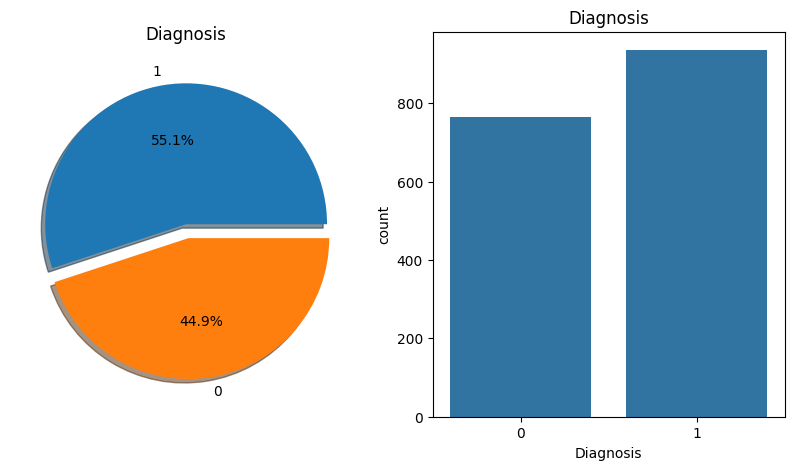

In [90]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
diagnosis_counts = liver['Diagnosis'].value_counts()
diagnosis_counts.plot.pie(
    explode=[0, 0.1], 
    autopct='%1.1f%%', 
    ax=ax[0], 
    shadow=True
)
ax[0].set_title('Diagnosis')
ax[0].set_ylabel('')
sns.countplot(x='Diagnosis', data=liver, ax=ax[1])
ax[1].set_title('Diagnosis')
N, P = diagnosis_counts
print('Negative (0):', N)
print('Positive (1):', P)

In [91]:
liver.corr()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
Age,1.000000,-0.009323,0.038283,0.008236,-0.013683,-0.012948,-0.015212,0.024209,0.000678,-0.013105,0.156099
Gender,-0.009323,1.000000,0.013458,-0.003312,-0.023403,0.017394,0.009379,0.000012,0.024131,0.024603,0.189558
BMI,0.038283,0.013458,1.000000,-0.024749,-0.018322,-0.007686,-0.010888,-0.007808,-0.004850,0.043684,0.167655
AlcoholConsumption,0.008236,-0.003312,-0.024749,1.000000,-0.013794,-0.016808,-0.024232,0.013490,0.016640,-0.043480,0.349610
Smoking,-0.013683,-0.023403,-0.018322,-0.013794,1.000000,-0.007374,0.007054,0.001455,0.040314,0.000838,0.200071
GeneticRisk,-0.012948,0.017394,-0.007686,-0.016808,-0.007374,1.000000,-0.011594,-0.010785,0.018990,-0.008061,0.118292
PhysicalActivity,-0.015212,0.009379,-0.010888,-0.024232,0.007054,-0.011594,1.000000,-0.006939,0.018569,-0.010393,-0.116689
Diabetes,0.024209,0.000012,-0.007808,0.013490,0.001455,-0.010785,-0.006939,1.000000,0.049166,0.018153,0.107480
Hypertension,0.000678,0.024131,-0.004850,0.016640,0.040314,0.018990,0.018569,0.049166,1.000000,0.007847,0.170683
LiverFunctionTest,-0.013105,0.024603,0.043684,-0.043480,0.000838,-0.008061,-0.010393,0.018153,0.007847,1.000000,0.354003


<Axes: >

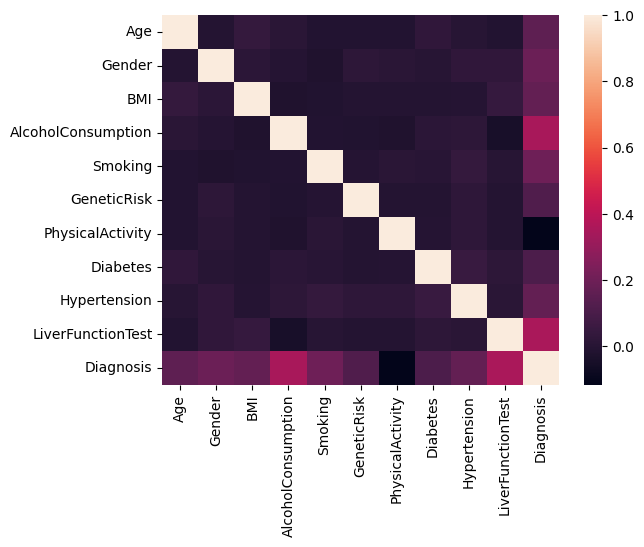

In [92]:
sns.heatmap(liver.corr())

In [93]:
liver['Diagnosis'].shape

(1700,)

In [94]:
liver['Diagnosis'].value_counts()

Diagnosis
1    936
0    764
Name: count, dtype: int64

In [95]:
x= liver.drop(columns='Diagnosis',axis=1)
y=liver['Diagnosis']

In [96]:
print(x)

      Age  Gender        BMI  AlcoholConsumption  Smoking  GeneticRisk  \
0      58       0  35.857584           17.272828        0            1   
1      71       1  30.732470            2.201266        0            1   
2      48       0  19.971407           18.500944        0            0   
3      34       1  16.615417           12.632870        0            0   
4      62       1  16.065830            1.087815        0            1   
...   ...     ...        ...                 ...      ...          ...   
1695   42       0  38.498295           14.384688        0            1   
1696   40       0  27.600094            5.431009        0            0   
1697   38       0  38.730017            6.324302        1            2   
1698   67       0  35.820798           16.899417        0            2   
1699   80       0  24.060783            9.526447        0            0   

      PhysicalActivity  Diabetes  Hypertension  LiverFunctionTest  
0             0.658940         0           

In [97]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
1695    1
1696    1
1697    1
1698    1
1699    1
Name: Diagnosis, Length: 1700, dtype: int64


In [98]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

In [99]:
print(x.shape,x_train.shape,x_test.shape)

(1700, 10) (1190, 10) (510, 10)


In [100]:
print(y.shape,y_train.shape,y_test.shape)

(1700,) (1190,) (510,)


In [101]:
model= LogisticRegression()
model.fit(x_train,y_train)

C:\Users\punit\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
prediction= model.predict(x_test)
print(prediction)

[1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1
 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1
 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1
 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1
 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0
 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0
 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0
 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1
 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0
 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0
 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1
 0 0 0 1 0 0 0 1 0 1 1 1 

In [103]:
accuracy= accuracy_score(prediction,y_test)
print(accuracy)

0.8137254901960784


In [107]:
import pickle
import numpy as np
pickle.dump(model,open('liver.pkl','wb'))


[0]


C:\Users\punit\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
